In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

**Membaca Data yang Dimiliki**

In [ ]:
url = 'https://raw.githubusercontent.com/Ellayuninf/Riset-Informatika/main/Analisis%20Segmetasi%20Pengunjung%20suatu%20Mall%20dengan%20Metode%20K-means%20Clustering%20menggunakan%20Elbow%20Method/supermarket_sales%20-%20Sheet1.csv'
df = pd.read_csv(url)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull()
df.isnull().any()
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Menambahkan kolom 'Bulan' pada tabel**

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df['Bulan'] = pd.to_datetime(df['Date']).dt.month
df['Tahun'] = pd.to_datetime(df['Date']).dt.year
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Bulan,Tahun
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019


# Analisis Penjualan
**Pertanyaan 1: Pada bulan apa penjualan terbanyak?**

In [ ]:
df['Bulan'].value_counts()

1    352
3    345
2    303
Name: Bulan, dtype: int64

In [ ]:
hasil = df.groupby('Bulan').sum()

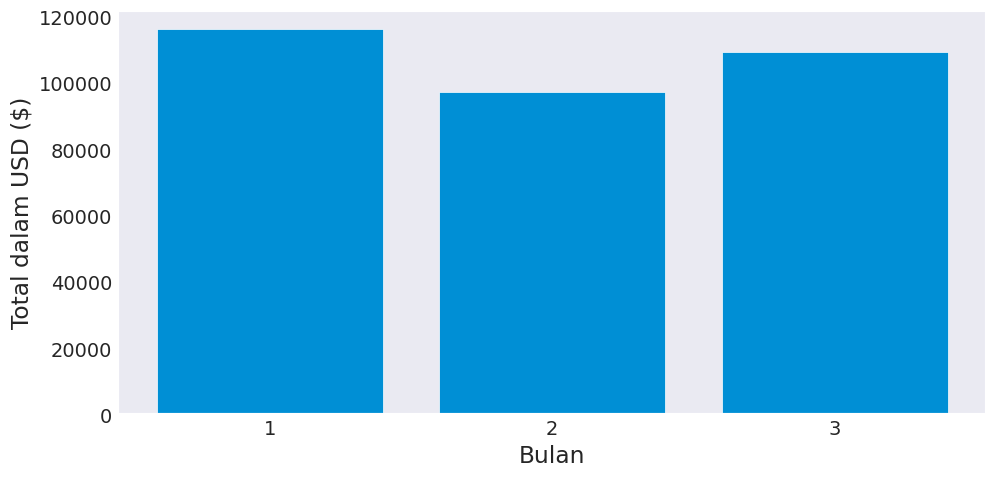

In [ ]:
bulan = [Bulan for Bulan, df in df.groupby('Bulan')]
plt.figure(figsize=(10,5))
plt.bar(bulan, hasil['Total'])
plt.xticks(bulan)
plt.ylabel('Total dalam USD ($)')
plt.xlabel('Bulan')
plt.grid()
plt.show()

In [ ]:
hasil['Total']

Bulan
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

Berdasarkan hasil diatas dapat dilihat transaksi terbanyak ada pada bulan Januari dan terbanyak kedua ada pada bulan Maret. Pada bulan januari total pendapatannya mencapai 116291.868 USD

**Pertanyaan 2: Apa metode pembayaran yang memiliki transaksi terbanyak?**

In [ ]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [ ]:
hasil2 = df.groupby('Payment').sum()

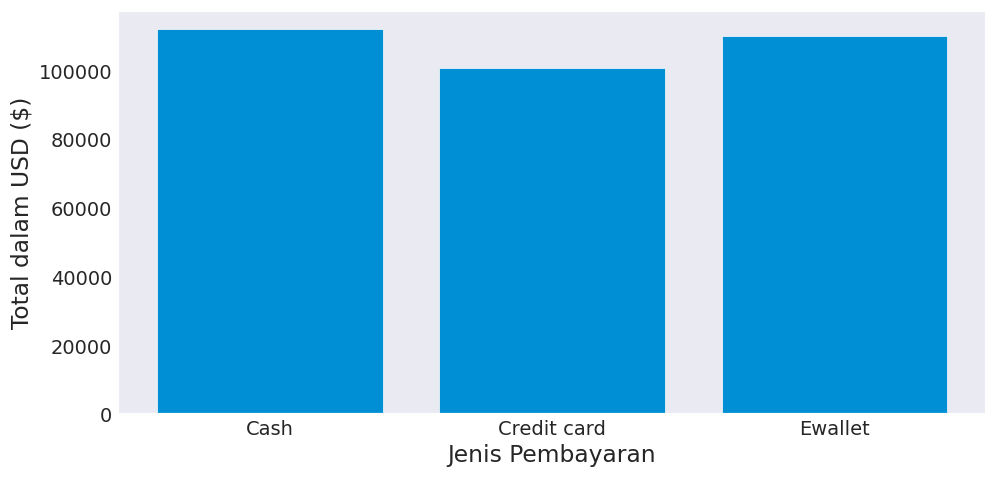

In [ ]:
pembayaran = [Payment for Payment, df in df.groupby('Payment')]
plt.figure(figsize=(10,5))
plt.bar(pembayaran, hasil2['Total'])
plt.xticks(pembayaran)
plt.ylabel('Total dalam USD ($)')
plt.xlabel('Jenis Pembayaran')
plt.grid()
plt.show()

In [ ]:
total=df.groupby(['Payment']).sum().sort_values('Payment',ascending=True).head(10)
total=total[['Total','gross income']].round(2)
total

,Total,gross income
Payment,,
Cash,112206.57,5343.17
Credit card,100767.07,4798.43
Ewallet,109993.11,5237.77


[Text(0.5, 1.0, 'Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')]

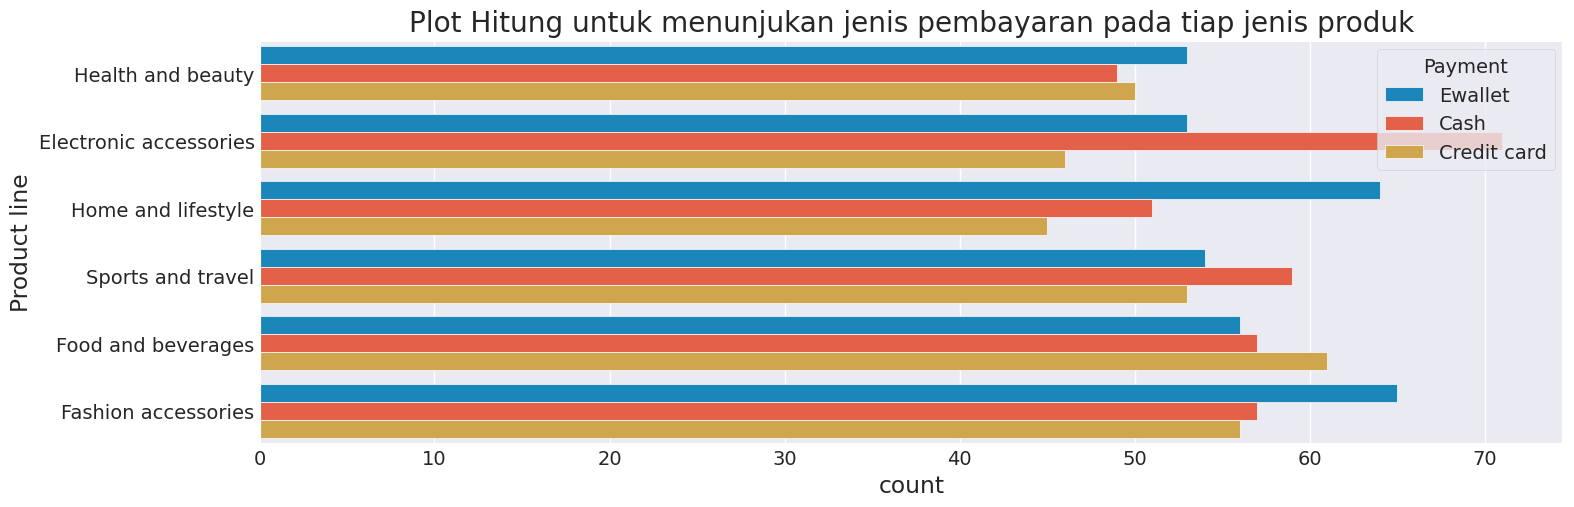

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='Payment').set(title='Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')

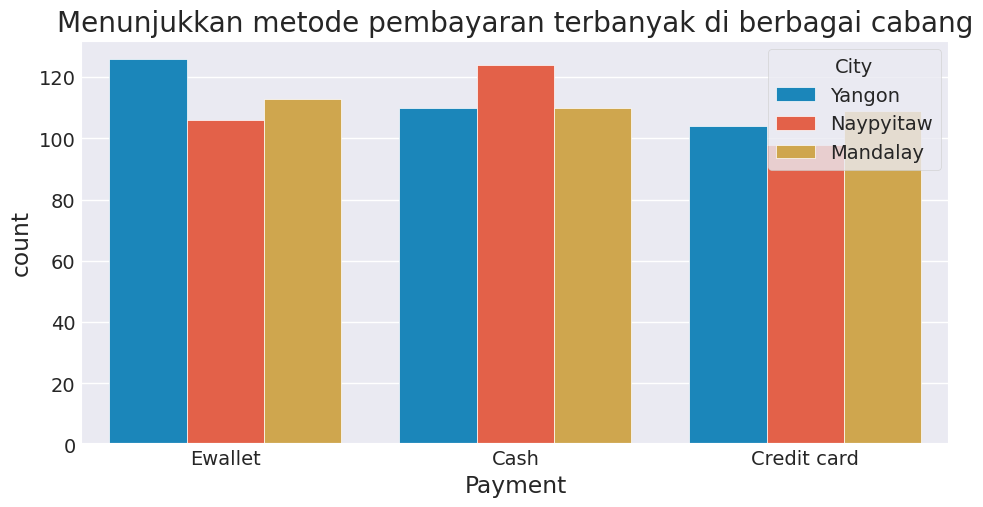

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Payment', hue='City')
plt.title('Menunjukkan metode pembayaran terbanyak di berbagai cabang')
plt.show()

Metode pembayaran antara Ewallet dan Cash hanya selisih 1 orang saja, akan tetapi transaksi terbanyak dilakukan dengan pembayaran secara Cash. Pembelian Elektronik Accessories menjadi pembelian dengan jenis pembayaran Cash terbanyak. Sedangkan pembelian E Wallet terbanyak ada pada produk Fashion Accessories Pembayaran dengan metode E wallet banyak dilakukan di Yangon Pembayaran dengan metode Cash banyak dilakukan di Naypitaw Pembayaran dengan metode Credit card banyak dilakukan di Mandalay

**Pertanyaan 3: Kapan waktu terbaik untuk melakukan promosi?**

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Jam'] = df['Time'].dt.hour
df['Menit'] = df['Time'].dt.minute

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Bulan,Tahun,Jam,Menit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2023-12-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2023-12-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2023-12-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2023-12-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2023-12-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,10,37


In [ ]:
Waktu = df.groupby('Jam').sum()

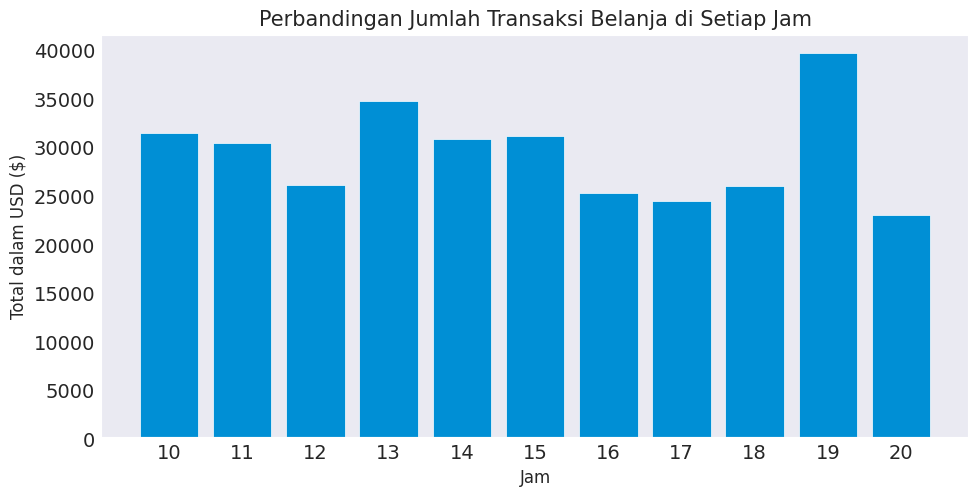

In [ ]:
waktu = [Jam for Jam, df in df.groupby('Jam')]
plt.figure(figsize=(10,5))
plt.bar(waktu, Waktu['Total'])
plt.title('Perbandingan Jumlah Transaksi Belanja di Setiap Jam', fontsize=15)
plt.xticks(waktu)
plt.ylabel('Total dalam USD ($)', fontsize=12)
plt.xlabel('Jam', fontsize=12)
plt.grid()
plt.show()

In [ ]:
promosi=df.groupby(['Jam']).sum().sort_values('Jam',ascending=True)
promosi=promosi[['Total','gross income']].round(2)
promosi

,Total,gross income
Jam,,
10,31421.48,1496.26
11,30377.33,1446.54
12,26065.88,1241.23
13,34723.23,1653.49
14,30828.40,1468.02
15,31179.51,1484.74
16,25226.32,1201.25
17,24445.22,1164.06
18,26030.34,1239.54


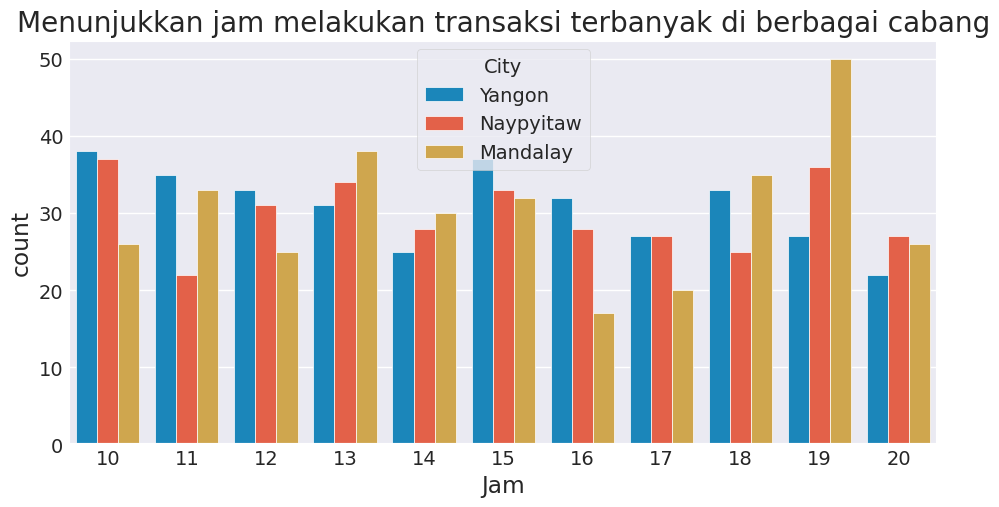

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Jam', hue='City')
plt.title('Menunjukkan jam melakukan transaksi terbanyak di berbagai cabang')
plt.show()

Secara keseluruhan dapat dilihat pada Jam 19.00 merupakan jam disaat transaksi terbanyak dilakukan. Berdasarkan tiap cabangnya dapat dibandingkan, di kota Mandalay jam 19.00 memang menjadi jam dengan pembeli terbanyak, di kota Yangon Jam 10.00 menjadi jam dengan pembeli terbanyak, dan di kota Naypitaw jam dengan pembeli terbanyak adalah jam 10.00

**Pertanyaan 4: Apakah Member melakukan pembelian lebih banyak daripada Non Member?**

<Axes: ylabel='Customer type'>

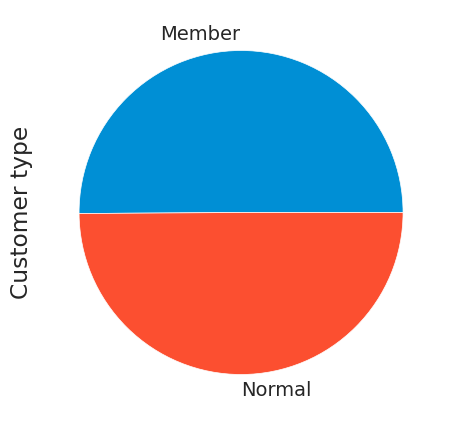

In [ ]:
plt.figure(figsize=(10,5))
df['Customer type'].value_counts().plot.pie()

In [ ]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

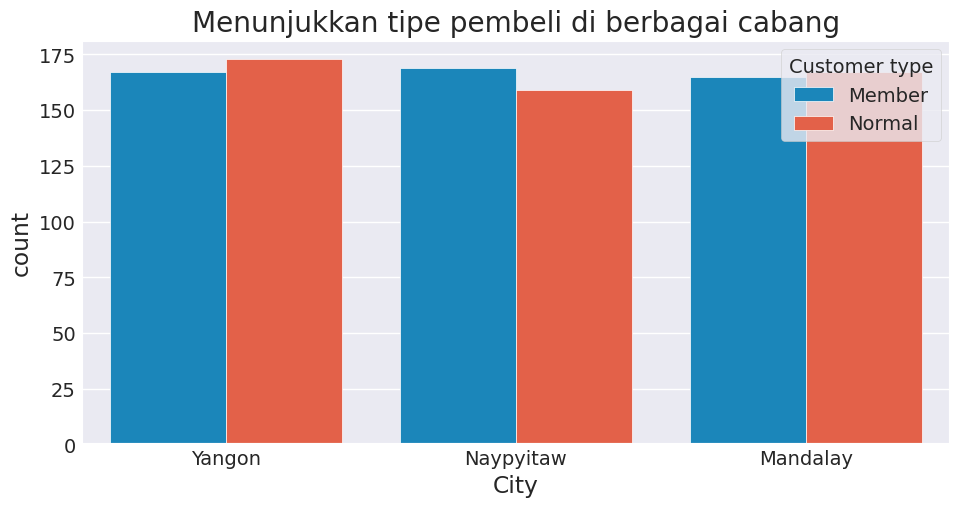

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='City', hue='Customer type')
plt.title('Menunjukkan tipe pembeli di berbagai cabang')
plt.show()

In [ ]:
Membership = df.groupby('Customer type').sum()

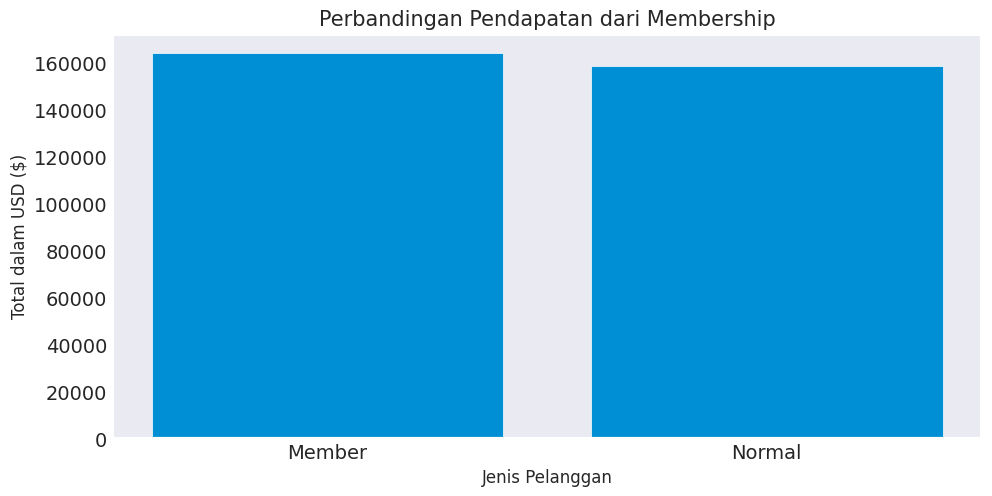

In [ ]:
membership = [Customer_type for Customer_type, df in df.groupby('Customer type')]
plt.figure(figsize=(10,5))
plt.bar(membership, Membership['Total'])
plt.title('Perbandingan Pendapatan dari Membership', fontsize=15)
plt.xticks(membership)
plt.ylabel('Total dalam USD ($)', fontsize=12)
plt.xlabel('Jenis Pelanggan', fontsize=12)
plt.grid()
plt.show()

In [ ]:
keanggotaan=df.groupby(['Customer type']).sum().sort_values('Customer type',ascending=True)
keanggotaan=keanggotaan[['Total','gross income']].round(2)
keanggotaan

,Total,gross income
Customer type,,
Member,164223.44,7820.16
Normal,158743.30,7559.20


Dapat terlihat, pelanggan member dengan pelanggan normal hanya memiliki selisiih sedikit, dengan hal tersebut jenis pelanggan dengan kategori member membelanjakan uangnya lebih banyak dibandingkan jenis pelanggan normal

**Pertanyaan 5: Apa Produk yang paling banyak dibeli?**

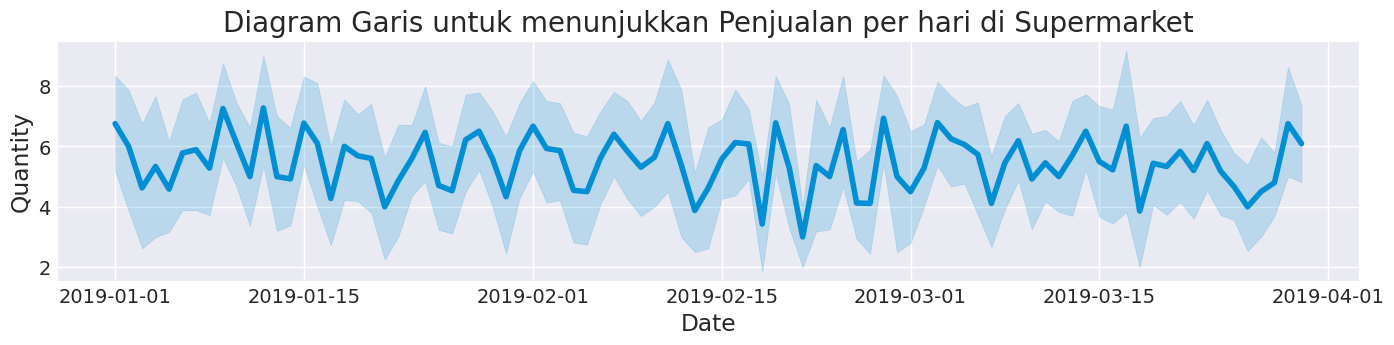

In [ ]:
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='Date', y='Quantity', data=df)
ax.set_title('Diagram Garis untuk menunjukkan Penjualan per hari di Supermarket', fontdict={'fontsize': 20})
plt.show()

In [ ]:
Produk = df.groupby('Product line').sum()

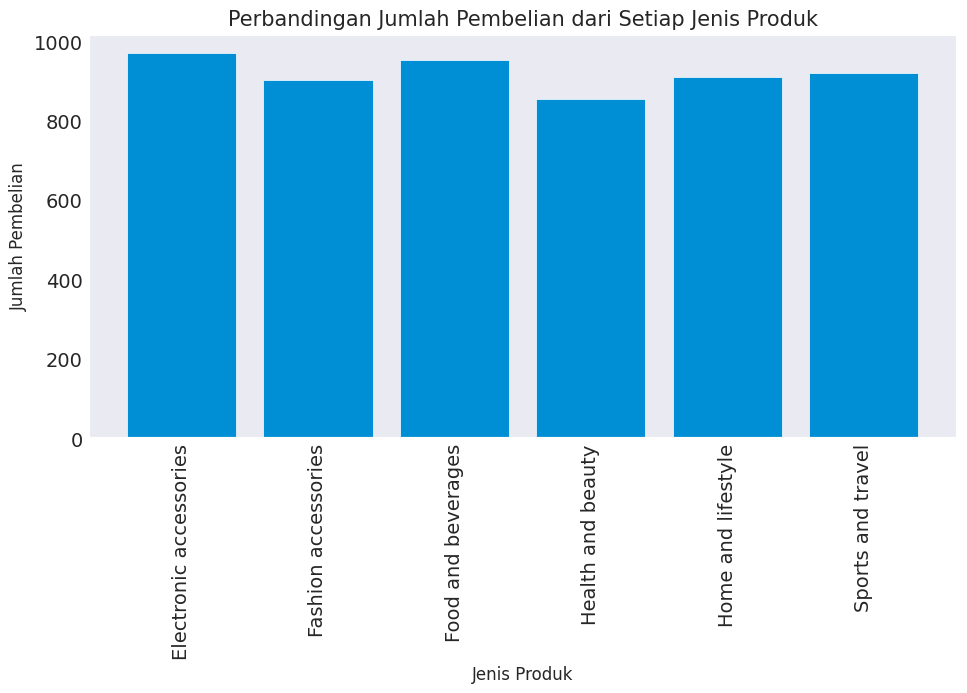

In [ ]:
produk = [Product_line for Product_line, df in df.groupby('Product line')]
plt.figure(figsize=(10,5))
plt.bar(produk, Produk['Quantity'])
plt.xticks(produk,rotation = 'vertical')
plt.title('Perbandingan Jumlah Pembelian dari Setiap Jenis Produk', fontsize=15)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

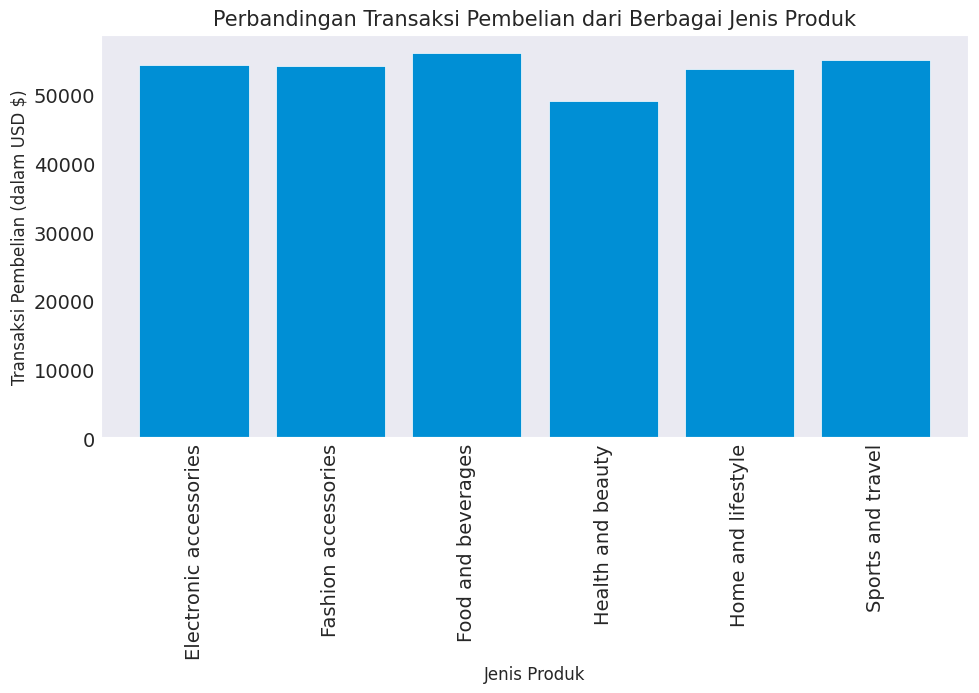

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(produk, Produk['Total'])
plt.xticks(produk,rotation = 'vertical')
plt.title('Perbandingan Transaksi Pembelian dari Berbagai Jenis Produk', fontsize=15)
plt.ylabel('Transaksi Pembelian (dalam USD $)', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

In [ ]:
jentrans=df.groupby(['Product line']).sum().sort_values('Product line',ascending=True)
jentrans=jentrans[['Quantity','Total', 'gross income']].round(2)
jentrans

,Quantity,Total,gross income
Product line,,,
Electronic accessories,971,54337.53,2587.50
Fashion accessories,902,54305.90,2586.00
Food and beverages,952,56144.84,2673.56
Health and beauty,854,49193.74,2342.56
Home and lifestyle,911,53861.91,2564.85
Sports and travel,920,55122.83,2624.90


[Text(0.5, 1.0, 'Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')]

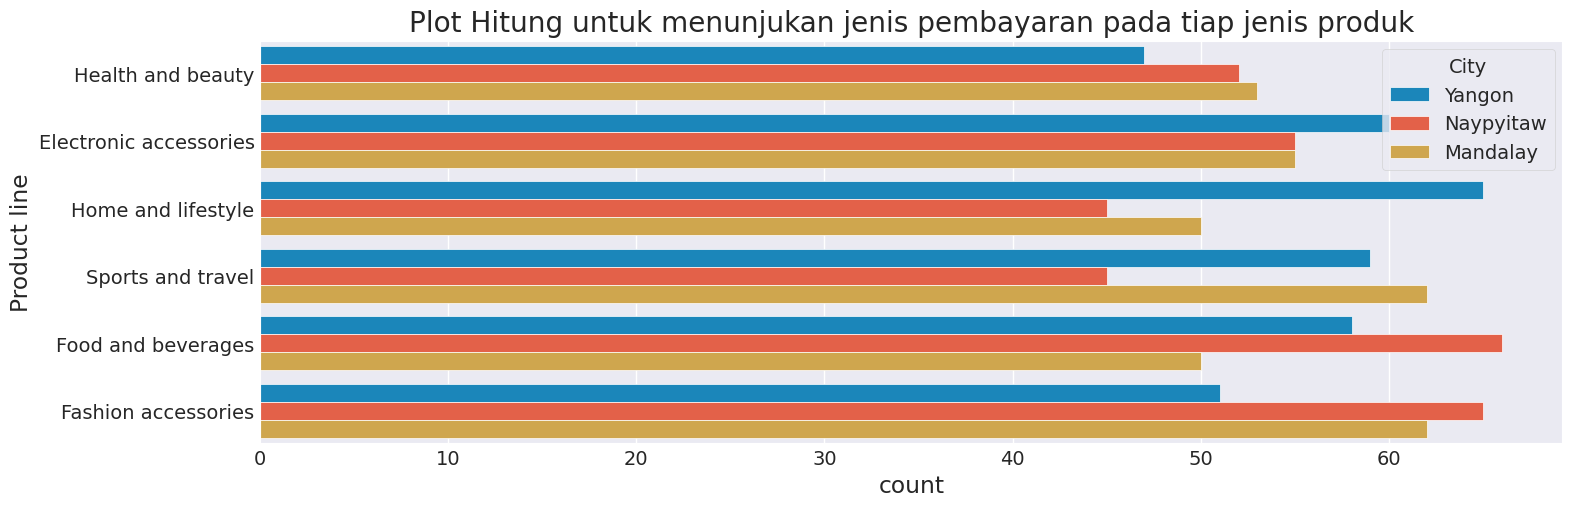

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='City').set(title='Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')

Di kota Naypitaw produk yang paling banyak dibeli adalah Food and Beverages dan Fashion Accessories, di kota Yangon yang terbanyak dibeli adalah Home and Lifestyle dan Electronic Accessories, sedangkan di kota Mandalay yang terbanyak adalah Fashion Accessories dan Sports and Travel

**Pertanyaan 6: Kota mana yang memiliki pendapatan bersih terbanyak?**

Text(0.5, 1.0, 'Perbandingan Jumlah Pembeli tiap Cabang')

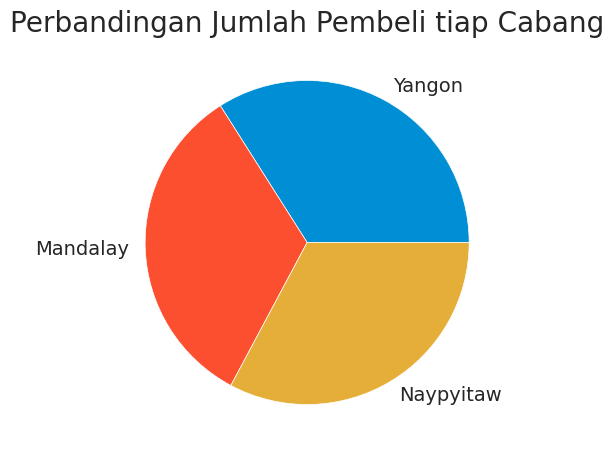

In [ ]:
plt.figure(figsize=(15,5))
df['City'].value_counts().plot.pie()
plt.ylabel('')
plt.title('Perbandingan Jumlah Pembeli tiap Cabang')

In [ ]:
kota=df.groupby(['City']).sum().sort_values('City',ascending=False)
kota=kota[['Quantity','Total', 'gross income']].round(2)
kota

,Quantity,Total,gross income
City,,,
Yangon,1859,106200.37,5057.16
Naypyitaw,1831,110568.71,5265.18
Mandalay,1820,106197.67,5057.03


In [ ]:
Kota = df.groupby('City').sum()

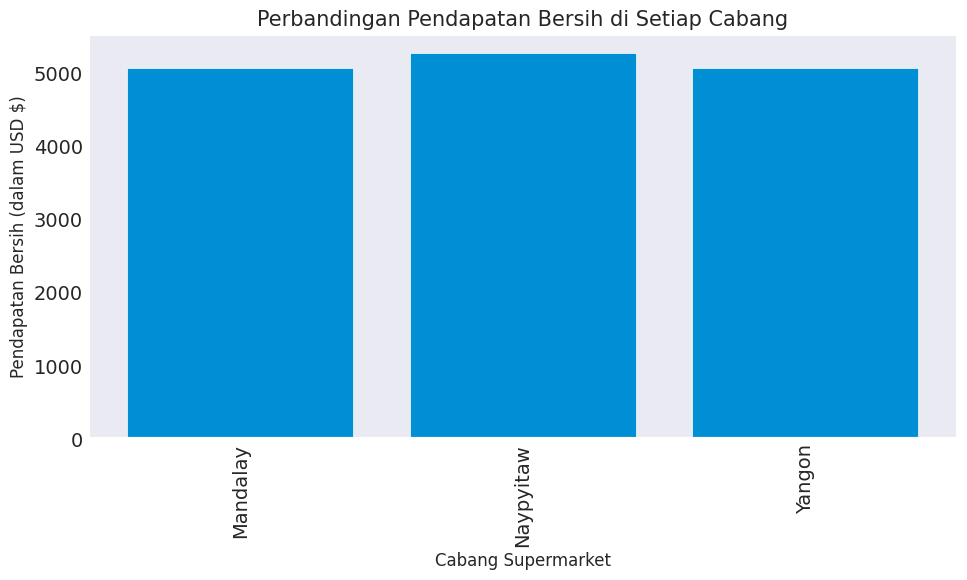

In [ ]:
kota2 = [City for City, df in df.groupby('City')]
plt.figure(figsize=(10,5))
plt.bar(kota2, Kota['gross income'])
plt.xticks(kota2,rotation = 'vertical')
plt.title('Perbandingan Pendapatan Bersih di Setiap Cabang', fontsize=15)
plt.ylabel('Pendapatan Bersih (dalam USD $)', fontsize=12)
plt.xlabel('Cabang Supermarket', fontsize=12)
plt.grid()
plt.show()

Berdasarkan hasil diatas dapat dilihat, walaupun Yangon memiliki jumlah pembeli dan kuantitas pembelian terbanyak. Naypitaw menjadi cabang dengan jumlah transaksi pembelian terbanyak dengan total 110568.71 USD dan total pendapatan bersihnya hingga 5265.18 USD

# SEGMENTASI K-Means

In [ ]:
# Menentukan variabel yang akan di klusterkan (Data Slicing)
X = df.iloc[:, [9, 15]].values
X

array([[548.9715,  26.1415],
       [ 80.22  ,   3.82  ],
       [340.5255,  16.2155],
       ...,
       [ 33.432 ,   1.592 ],
       [ 69.111 ,   3.291 ],
       [649.299 ,  30.919 ]])

In [ ]:
# Scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan data setelah scaling
print(X_scaled)

[[0.52161615 0.52161615]
 [0.06738704 0.06738704]
 [0.31962801 0.31962801]
 ...
 [0.02204857 0.02204857]
 [0.0566222  0.0566222 ]
 [0.6188354  0.6188354 ]]


# Menentukan Jumlah Clusters

**Elbow Method**

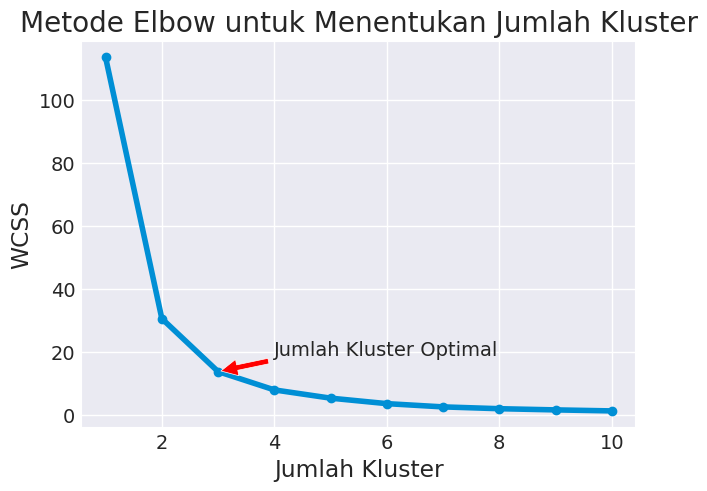

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot grafik elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')

# Menambahkan keterangan untuk jumlah kluster optimal
plt.annotate('Jumlah Kluster Optimal', xy=(3, wcss[2]), xytext=(4, wcss[2] + 5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.show()


In [ ]:
wcss

[113.42932094829916,
 30.63155942465701,
 13.836683592362892,
 8.025951287131438,
 5.413294719015907,
 3.6722900166535393,
 2.6419519081787604,
 2.0672017857730656,
 1.6915606946961184,
 1.3677393485415514]

# Evaluasi dengan Silhouette Score

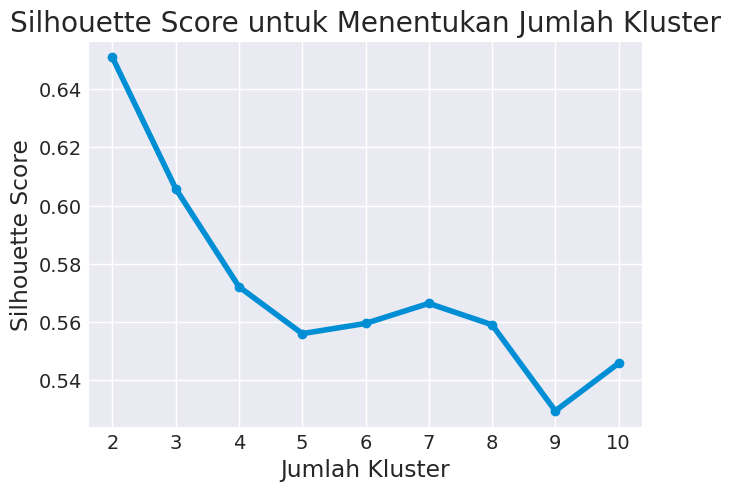

In [ ]:
from sklearn.metrics import silhouette_score

# Menentukan range jumlah kluster
num_clusters = range(2, 11)
silhouette_scores = []

# Menghitung silhouette score untuk setiap jumlah kluster
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot grafik silhouette score
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Menentukan Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')

plt.show()


In [ ]:
silhouette_scores

[0.6508577554020604,
 0.605816034327053,
 0.5721221946247949,
 0.5560100501017894,
 0.5595090616770597,
 0.5663993145836949,
 0.5590447196787148,
 0.529469819150472,
 0.5458289260304173]

# Implementasi Cluster Optimal

In [ ]:
# fitting k-means to the dataset
kmeans = KMeans (n_clusters=2, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X_scaled)

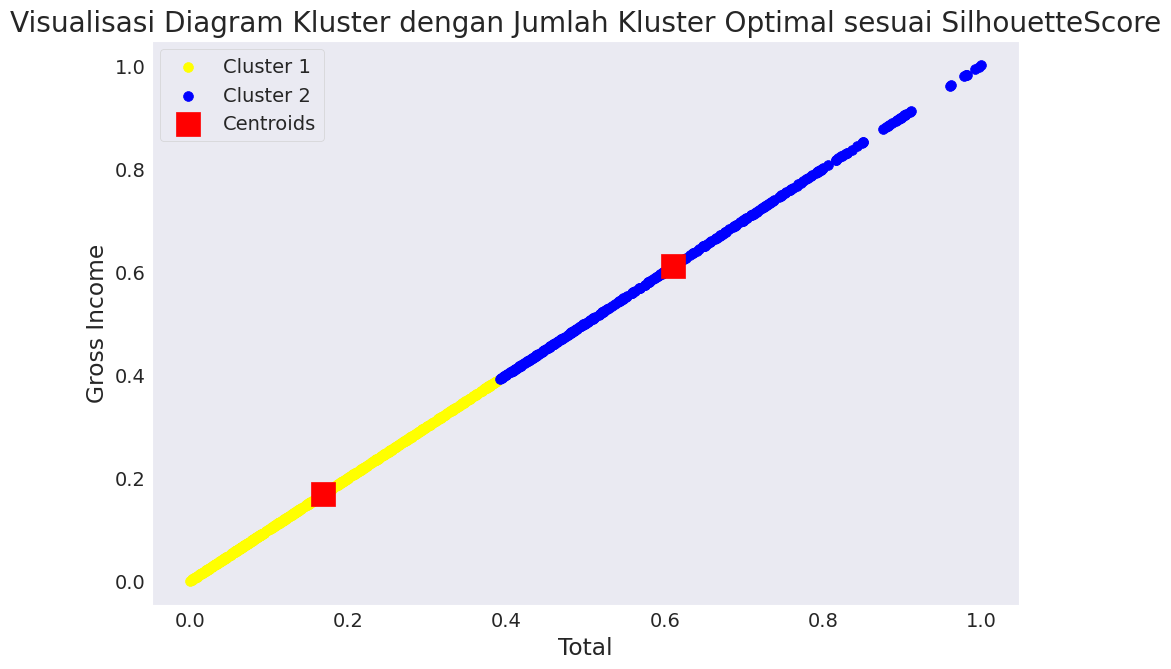

In [ ]:
# Visualisasi diagram kluster
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red',
            label='Centroids', s=300, marker=',')
plt.grid(False)
plt.title('Visualisasi Diagram Kluster dengan Jumlah Kluster Optimal sesuai SilhouetteScore')
plt.xlabel('Total')
plt.ylabel('Gross Income')
plt.legend()
plt.show()